In [2]:
import numpy as np
import typing as tp
import matplotlib.pyplot as plt

In [3]:
from BaselineSolver import BaselineSolver
from IterativeSolver import IterativeSolver
from utils import run_tests, read_tests_simplex_in_ball, run_random_test

In [4]:
def get_baseline_test_results(dimension: int, number_tests: int, 
                              lowest_grid_density: float=10, highest_grid_density: float=10000) -> tp.Tuple[np.ndarray, np.ndarray]:
    times = []
    t_errors = []
    for _ in range(number_tests):
        time, t_error = run_random_test(BaselineSolver, dimension, 
                                        {'grid_density': np.exp(np.random.uniform(np.log(lowest_grid_density), np.log(highest_grid_density)))}, 
                                        read_tests_simplex_in_ball, f'./tests/{dimension}d/simplex-in-ball/', silent=True)
        times.append(time)
        t_errors.append(t_error)
    
    return np.array(times), np.array(t_errors)

In [5]:
def plot_test_results(times: np.ndarray, t_errors: np.ndarray, title: str) -> None:
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111)
    plt.xlabel('time, s')
    plt.ylabel('t_error')
    ax.set_xscale('log')
    ax.set_yscale('log')
    plt.scatter(times, t_errors)
    plt.title(title)
    plt.savefig(f'figures/{title.replace(" ", "_").replace(",", "")}')

In [7]:
times_baseline_2d, errors_baseline_2d = get_baseline_test_results(2, 1000)

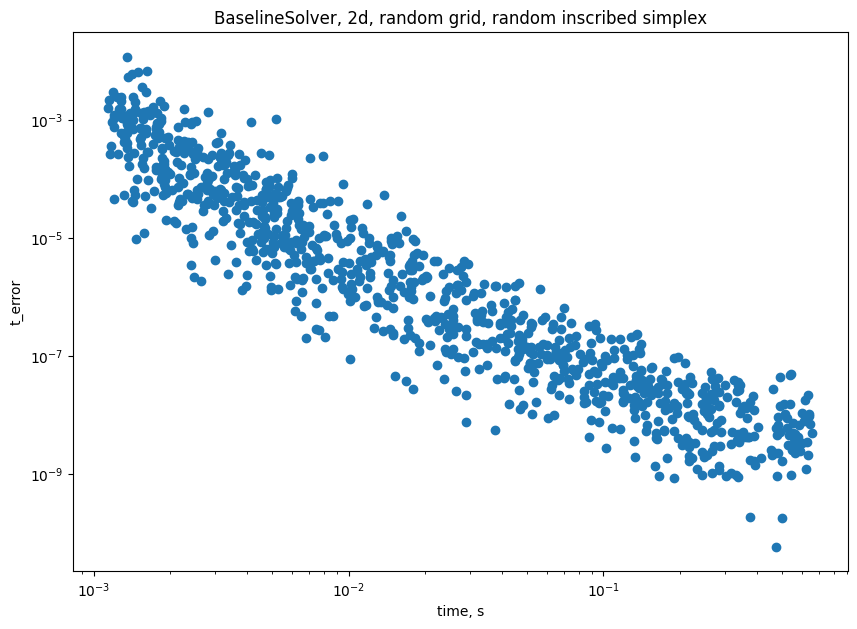

In [8]:
plot_test_results(times_baseline_2d, errors_baseline_2d, 'BaselineSolver, 2d, random grid, random inscribed simplex')

In [9]:
times_baseline_3d, errors_baseline_3d = get_baseline_test_results(3, 1000)

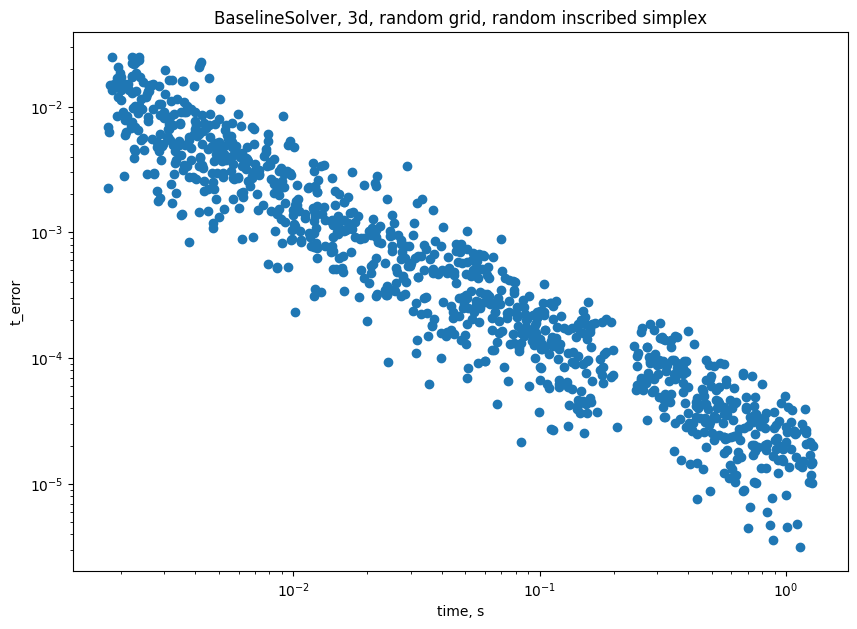

In [10]:
plot_test_results(times_baseline_3d, errors_baseline_3d, 'BaselineSolver, 3d, random grid, random inscribed simplex')

In [11]:
times_baseline_4d, errors_baseline_4d = get_baseline_test_results(4, 1000)

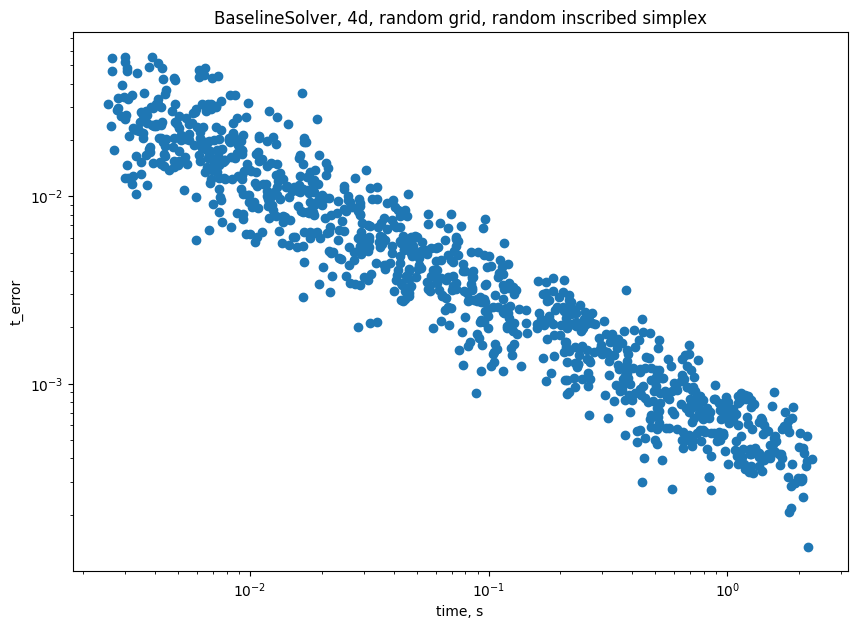

In [12]:
plot_test_results(times_baseline_4d, errors_baseline_4d, 'BaselineSolver, 4d, random grid, random inscribed simplex')

In [13]:
times_baseline_5d, errors_baseline_5d = get_baseline_test_results(5, 1000)

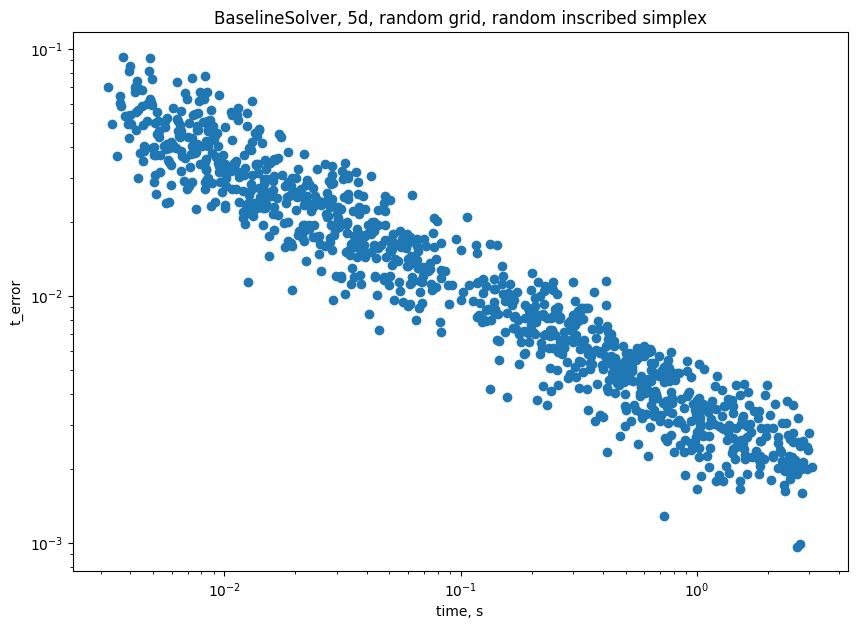

In [14]:
plot_test_results(times_baseline_5d, errors_baseline_5d, 'BaselineSolver, 5d, random grid, random inscribed simplex')

run_tests(IterativeSolver, 5, {'initial_grid_density': 1000, 'initial_cap_radius': 0.01, 'density_of_gridpoints_in_unit_cap': 10}, 
          read_tests_simplex_in_ball, f'./tests/5d/simplex-in-ball/')